In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("E:\ML\machine learning on notebook\credit_train.csv")

In [3]:
df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


In [4]:
df.drop(["Loan ID",	"Customer ID"], axis=1, inplace=True)

In [5]:
df.drop("Months since last delinquent", axis=1, inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100514 entries, 0 to 100513
Data columns (total 16 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Loan Status                100000 non-null  object 
 1   Current Loan Amount        100000 non-null  float64
 2   Term                       100000 non-null  object 
 3   Credit Score               80846 non-null   float64
 4   Annual Income              80846 non-null   float64
 5   Years in current job       95778 non-null   object 
 6   Home Ownership             100000 non-null  object 
 7   Purpose                    100000 non-null  object 
 8   Monthly Debt               100000 non-null  float64
 9   Years of Credit History    100000 non-null  float64
 10  Number of Open Accounts    100000 non-null  float64
 11  Number of Credit Problems  100000 non-null  float64
 12  Current Credit Balance     100000 non-null  float64
 13  Maximum Open Credit        99

In [7]:
df.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,1.000000e+05,80846.000000,8.084600e+04,100000.000000,100000.000000,100000.00000,100000.000000,1.000000e+05,9.999800e+04,99796.000000,99990.000000
mean,1.176045e+07,1076.456089,1.378277e+06,18472.412336,18.199141,11.12853,0.168310,2.946374e+05,7.607984e+05,0.117740,0.029313
std,3.178394e+07,1475.403791,1.081360e+06,12174.992609,7.015324,5.00987,0.482705,3.761709e+05,8.384503e+06,0.351424,0.258182
min,1.080200e+04,585.000000,7.662700e+04,0.000000,3.600000,0.00000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.796520e+05,705.000000,8.488440e+05,10214.162500,13.500000,8.00000,0.000000,1.126700e+05,2.734380e+05,0.000000,0.000000
50%,3.122460e+05,724.000000,1.174162e+06,16220.300000,16.900000,10.00000,0.000000,2.098170e+05,4.678740e+05,0.000000,0.000000
75%,5.249420e+05,741.000000,1.650663e+06,24012.057500,21.700000,14.00000,0.000000,3.679588e+05,7.829580e+05,0.000000,0.000000
max,1.000000e+08,7510.000000,1.655574e+08,435843.280000,70.500000,76.00000,15.000000,3.287897e+07,1.539738e+09,7.000000,15.000000


In [8]:
df[df["Credit Score"]<=900].shape

(76295, 16)

In [9]:
df = df[df["Credit Score"]<=900]

In [10]:
df.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,7.629500e+04,76295.000000,7.629500e+04,76295.000000,76295.000000,76295.000000,76295.000000,7.629500e+04,7.629500e+04,76143.000000,76289.000000
mean,1.531821e+07,716.615230,1.382671e+06,18506.834511,18.203950,11.134190,0.170286,2.950268e+05,7.406861e+05,0.119354,0.029690
std,3.564677e+07,28.117302,9.147446e+05,12254.611991,7.004076,5.021408,0.486907,3.669809e+05,7.074528e+06,0.354176,0.262975
min,1.124200e+04,585.000000,7.662700e+04,0.000000,3.700000,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.867030e+05,704.000000,8.525775e+05,10226.275000,13.500000,8.000000,0.000000,1.119860e+05,2.720080e+05,0.000000,0.000000
50%,3.255780e+05,722.000000,1.184004e+06,16244.050000,16.900000,10.000000,0.000000,2.099500e+05,4.674780e+05,0.000000,0.000000
75%,5.568860e+05,739.000000,1.661626e+06,24049.630000,21.700000,14.000000,0.000000,3.680490e+05,7.836180e+05,0.000000,0.000000
max,1.000000e+08,751.000000,3.647544e+07,435843.280000,70.500000,76.000000,15.000000,1.298696e+07,1.539738e+09,7.000000,15.000000


In [11]:
df.head()

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,6.0,1.0,228190.0,416746.0,1.0,0.0
2,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,18.0,1.0,297996.0,750090.0,0.0,0.0
3,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,9.0,0.0,256329.0,386958.0,0.0,0.0
6,Fully Paid,217646.0,Short Term,730.0,1184194.0,< 1 year,Home Mortgage,Debt Consolidation,10855.08,19.6,13.0,1.0,122170.0,272052.0,1.0,0.0
8,Fully Paid,548746.0,Short Term,678.0,2559110.0,2 years,Rent,Debt Consolidation,18660.28,22.6,4.0,0.0,437171.0,555038.0,0.0,0.0


In [12]:
df["Term"].value_counts()

Term
Short Term    54901
Long Term     21394
Name: count, dtype: int64

In [13]:
df["Years in current job"].value_counts()

Years in current job
10+ years    23972
2 years       6983
3 years       6244
< 1 year      6197
5 years       5186
1 year        4846
4 years       4670
6 years       4299
7 years       4226
8 years       3509
9 years       2997
Name: count, dtype: int64

In [14]:
df["Years in current job"] = df["Years in current job"].str.replace(" years", "")

In [15]:
df["Years in current job"] = df["Years in current job"].str.replace("< 1 year", "0")

In [16]:
df["Years in current job"] = df["Years in current job"].str.replace("1 year", "1")

In [17]:
df["Years in current job"] = df["Years in current job"].str.replace("10+", "10")

In [18]:
df["Years in current job"].value_counts(dropna=False)

Years in current job
10     23972
2       6983
3       6244
0       6197
5       5186
1       4846
4       4670
6       4299
7       4226
8       3509
NaN     3166
9       2997
Name: count, dtype: int64

In [19]:
np.round(df.groupby("Years in current job",dropna=False)["Annual Income"].mean())

Years in current job
0      1270070.0
1      1305508.0
10     1517727.0
2      1340116.0
3      1346630.0
4      1334735.0
5      1354347.0
6      1351284.0
7      1398992.0
8      1421259.0
9      1432225.0
NaN     911784.0
Name: Annual Income, dtype: float64

In [20]:
df["Years in current job"] = df["Years in current job"].fillna("0").astype("int")

In [21]:
df["Years in current job"].dtype

dtype('int32')

In [22]:
df.head()

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,Fully Paid,445412.0,Short Term,709.0,1167493.0,8,Home Mortgage,Home Improvements,5214.74,17.2,6.0,1.0,228190.0,416746.0,1.0,0.0
2,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8,Own Home,Debt Consolidation,29200.53,14.9,18.0,1.0,297996.0,750090.0,0.0,0.0
3,Fully Paid,347666.0,Long Term,721.0,806949.0,3,Own Home,Debt Consolidation,8741.90,12.0,9.0,0.0,256329.0,386958.0,0.0,0.0
6,Fully Paid,217646.0,Short Term,730.0,1184194.0,0,Home Mortgage,Debt Consolidation,10855.08,19.6,13.0,1.0,122170.0,272052.0,1.0,0.0
8,Fully Paid,548746.0,Short Term,678.0,2559110.0,2,Rent,Debt Consolidation,18660.28,22.6,4.0,0.0,437171.0,555038.0,0.0,0.0


In [23]:
df["Home Ownership"].value_counts()

Home Ownership
Home Mortgage    37084
Rent             31987
Own Home          7046
HaveMortgage       178
Name: count, dtype: int64

In [24]:
df["Purpose"].value_counts()

Purpose
Debt Consolidation      59656
other                    4762
Home Improvements        4501
Other                    2535
Business Loan            1183
Buy a Car                 976
Medical Bills             864
Buy House                 532
Take a Trip               452
major_purchase            264
small_business            213
moving                    116
wedding                    87
Educational Expenses       79
vacation                   68
renewable_energy            7
Name: count, dtype: int64

In [25]:
df.head(3)

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,Fully Paid,445412.0,Short Term,709.0,1167493.0,8,Home Mortgage,Home Improvements,5214.74,17.2,6.0,1.0,228190.0,416746.0,1.0,0.0
2,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8,Own Home,Debt Consolidation,29200.53,14.9,18.0,1.0,297996.0,750090.0,0.0,0.0
3,Fully Paid,347666.0,Long Term,721.0,806949.0,3,Own Home,Debt Consolidation,8741.90,12.0,9.0,0.0,256329.0,386958.0,0.0,0.0


In [26]:
# How many number of customer have fully paid their loan
# What is the relation of annual income and current loan amount
# Relation of Home ownership and current loan amount
# Relation of credit score and current loan amount
# Relation of home ownership and monthly debt
# year of credit history vs credit score
# number of credit problem vs current loan amount
# Relation of bankruptcies and number of credit problem
# Relation of all columns with Loan status

In [27]:
# Number of customers who have fully paid their loan
fully_paid_count = df[df['Loan Status'] == 'Fully Paid'].shape[0]
print("Number of customers who have fully paid their loan:", fully_paid_count)

Number of customers who have fully paid their loan: 63636


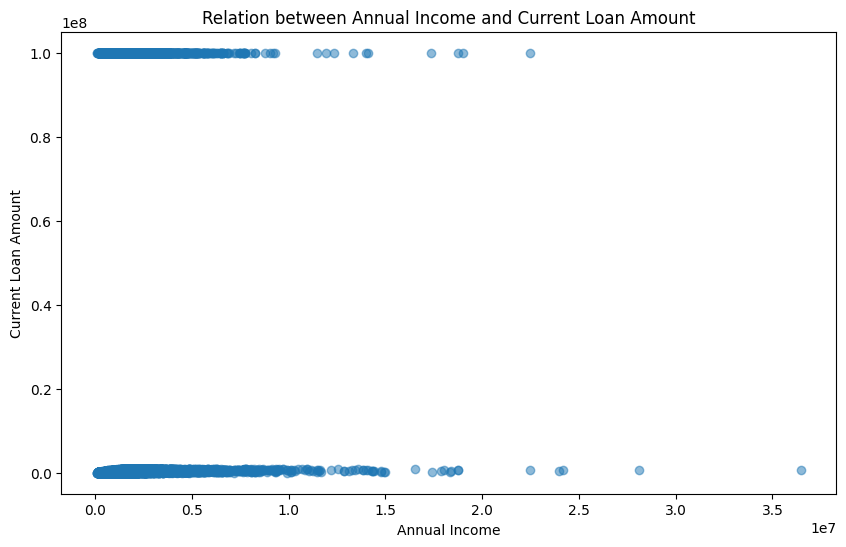

In [28]:
# Relation of annual income and current loan amount
plt.figure(figsize=(10, 6))
plt.scatter(df['Annual Income'], df['Current Loan Amount'], alpha=0.5)
plt.title('Relation between Annual Income and Current Loan Amount')
plt.xlabel('Annual Income')
plt.ylabel('Current Loan Amount')
plt.show()

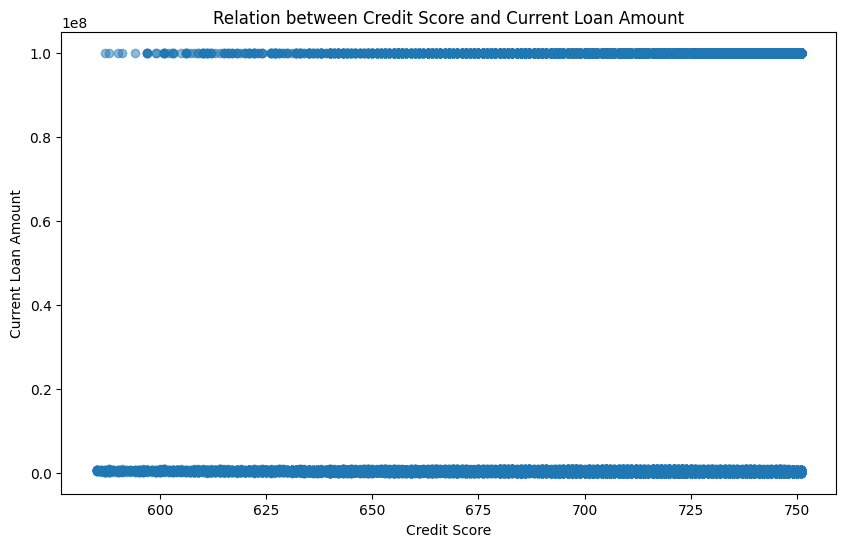

In [29]:
# Relation of credit score and current loan amount
plt.figure(figsize=(10, 6))
plt.scatter(df['Credit Score'], df['Current Loan Amount'], alpha=0.5)
plt.title('Relation between Credit Score and Current Loan Amount')
plt.xlabel('Credit Score')
plt.ylabel('Current Loan Amount')
plt.show()

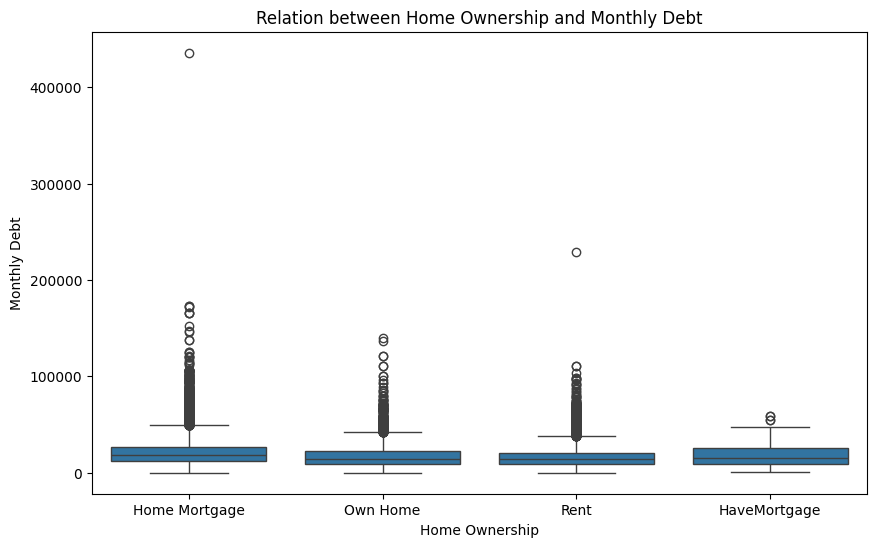

In [30]:
# Relation of home ownership and monthly debt
plt.figure(figsize=(10, 6))
sns.boxplot(x='Home Ownership', y='Monthly Debt', data=df)
plt.title('Relation between Home Ownership and Monthly Debt')
plt.xlabel('Home Ownership')
plt.ylabel('Monthly Debt')
plt.show()

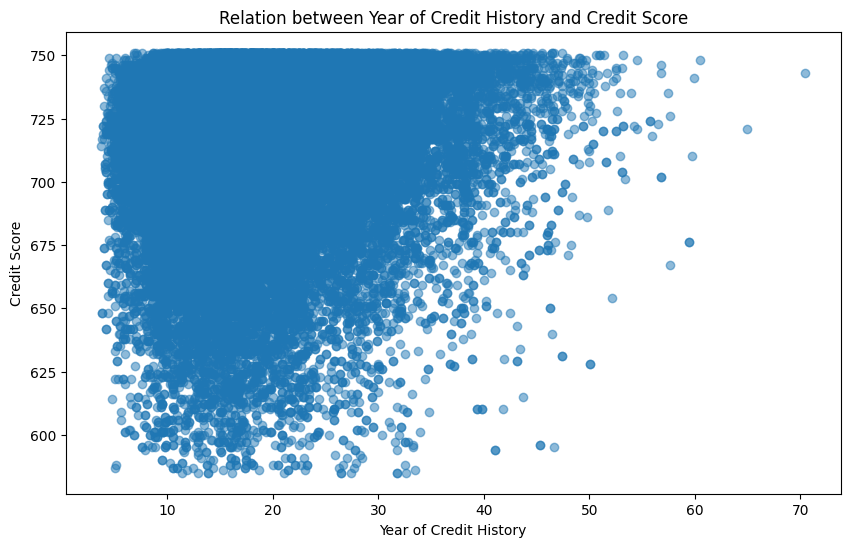

In [31]:
# Year of credit history vs credit score
plt.figure(figsize=(10, 6))
plt.scatter(df['Years of Credit History'], df['Credit Score'], alpha=0.5)
plt.title('Relation between Year of Credit History and Credit Score')
plt.xlabel('Year of Credit History')
plt.ylabel('Credit Score')
plt.show()

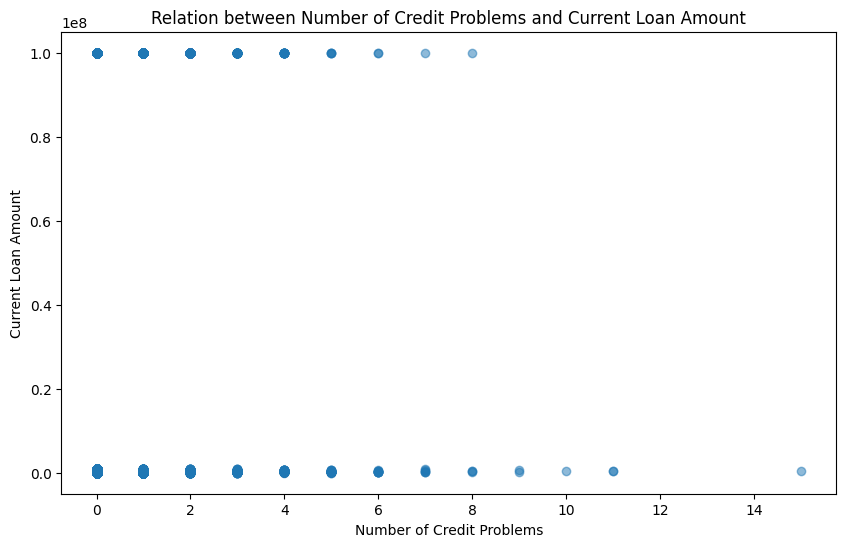

In [32]:
# Number of credit problems vs current loan amount
plt.figure(figsize=(10, 6))
plt.scatter(df['Number of Credit Problems'], df['Current Loan Amount'], alpha=0.5)
plt.title('Relation between Number of Credit Problems and Current Loan Amount')
plt.xlabel('Number of Credit Problems')
plt.ylabel('Current Loan Amount')
plt.show()

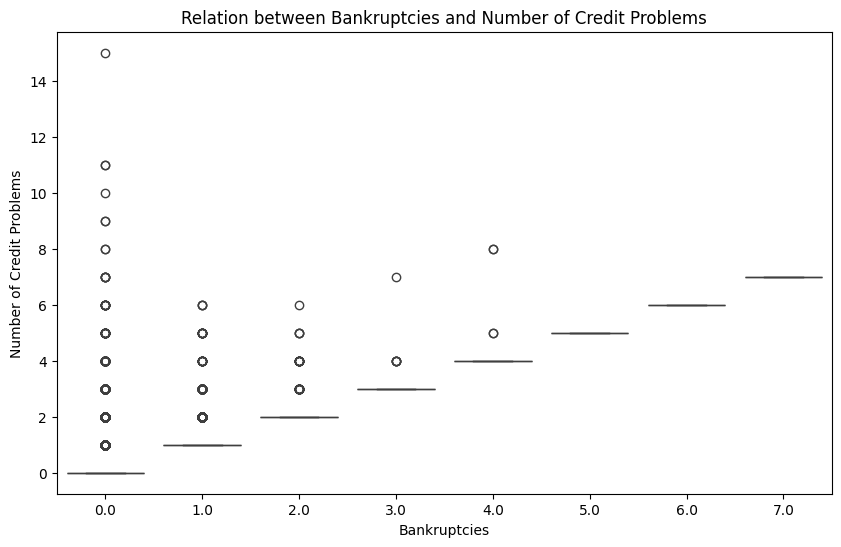

In [33]:
# Relation of bankruptcies and number of credit problems
plt.figure(figsize=(10, 6))
sns.boxplot(x='Bankruptcies', y='Number of Credit Problems', data=df)
plt.title('Relation between Bankruptcies and Number of Credit Problems')
plt.xlabel('Bankruptcies')
plt.ylabel('Number of Credit Problems')
plt.show()

<Figure size 2000x1500 with 0 Axes>

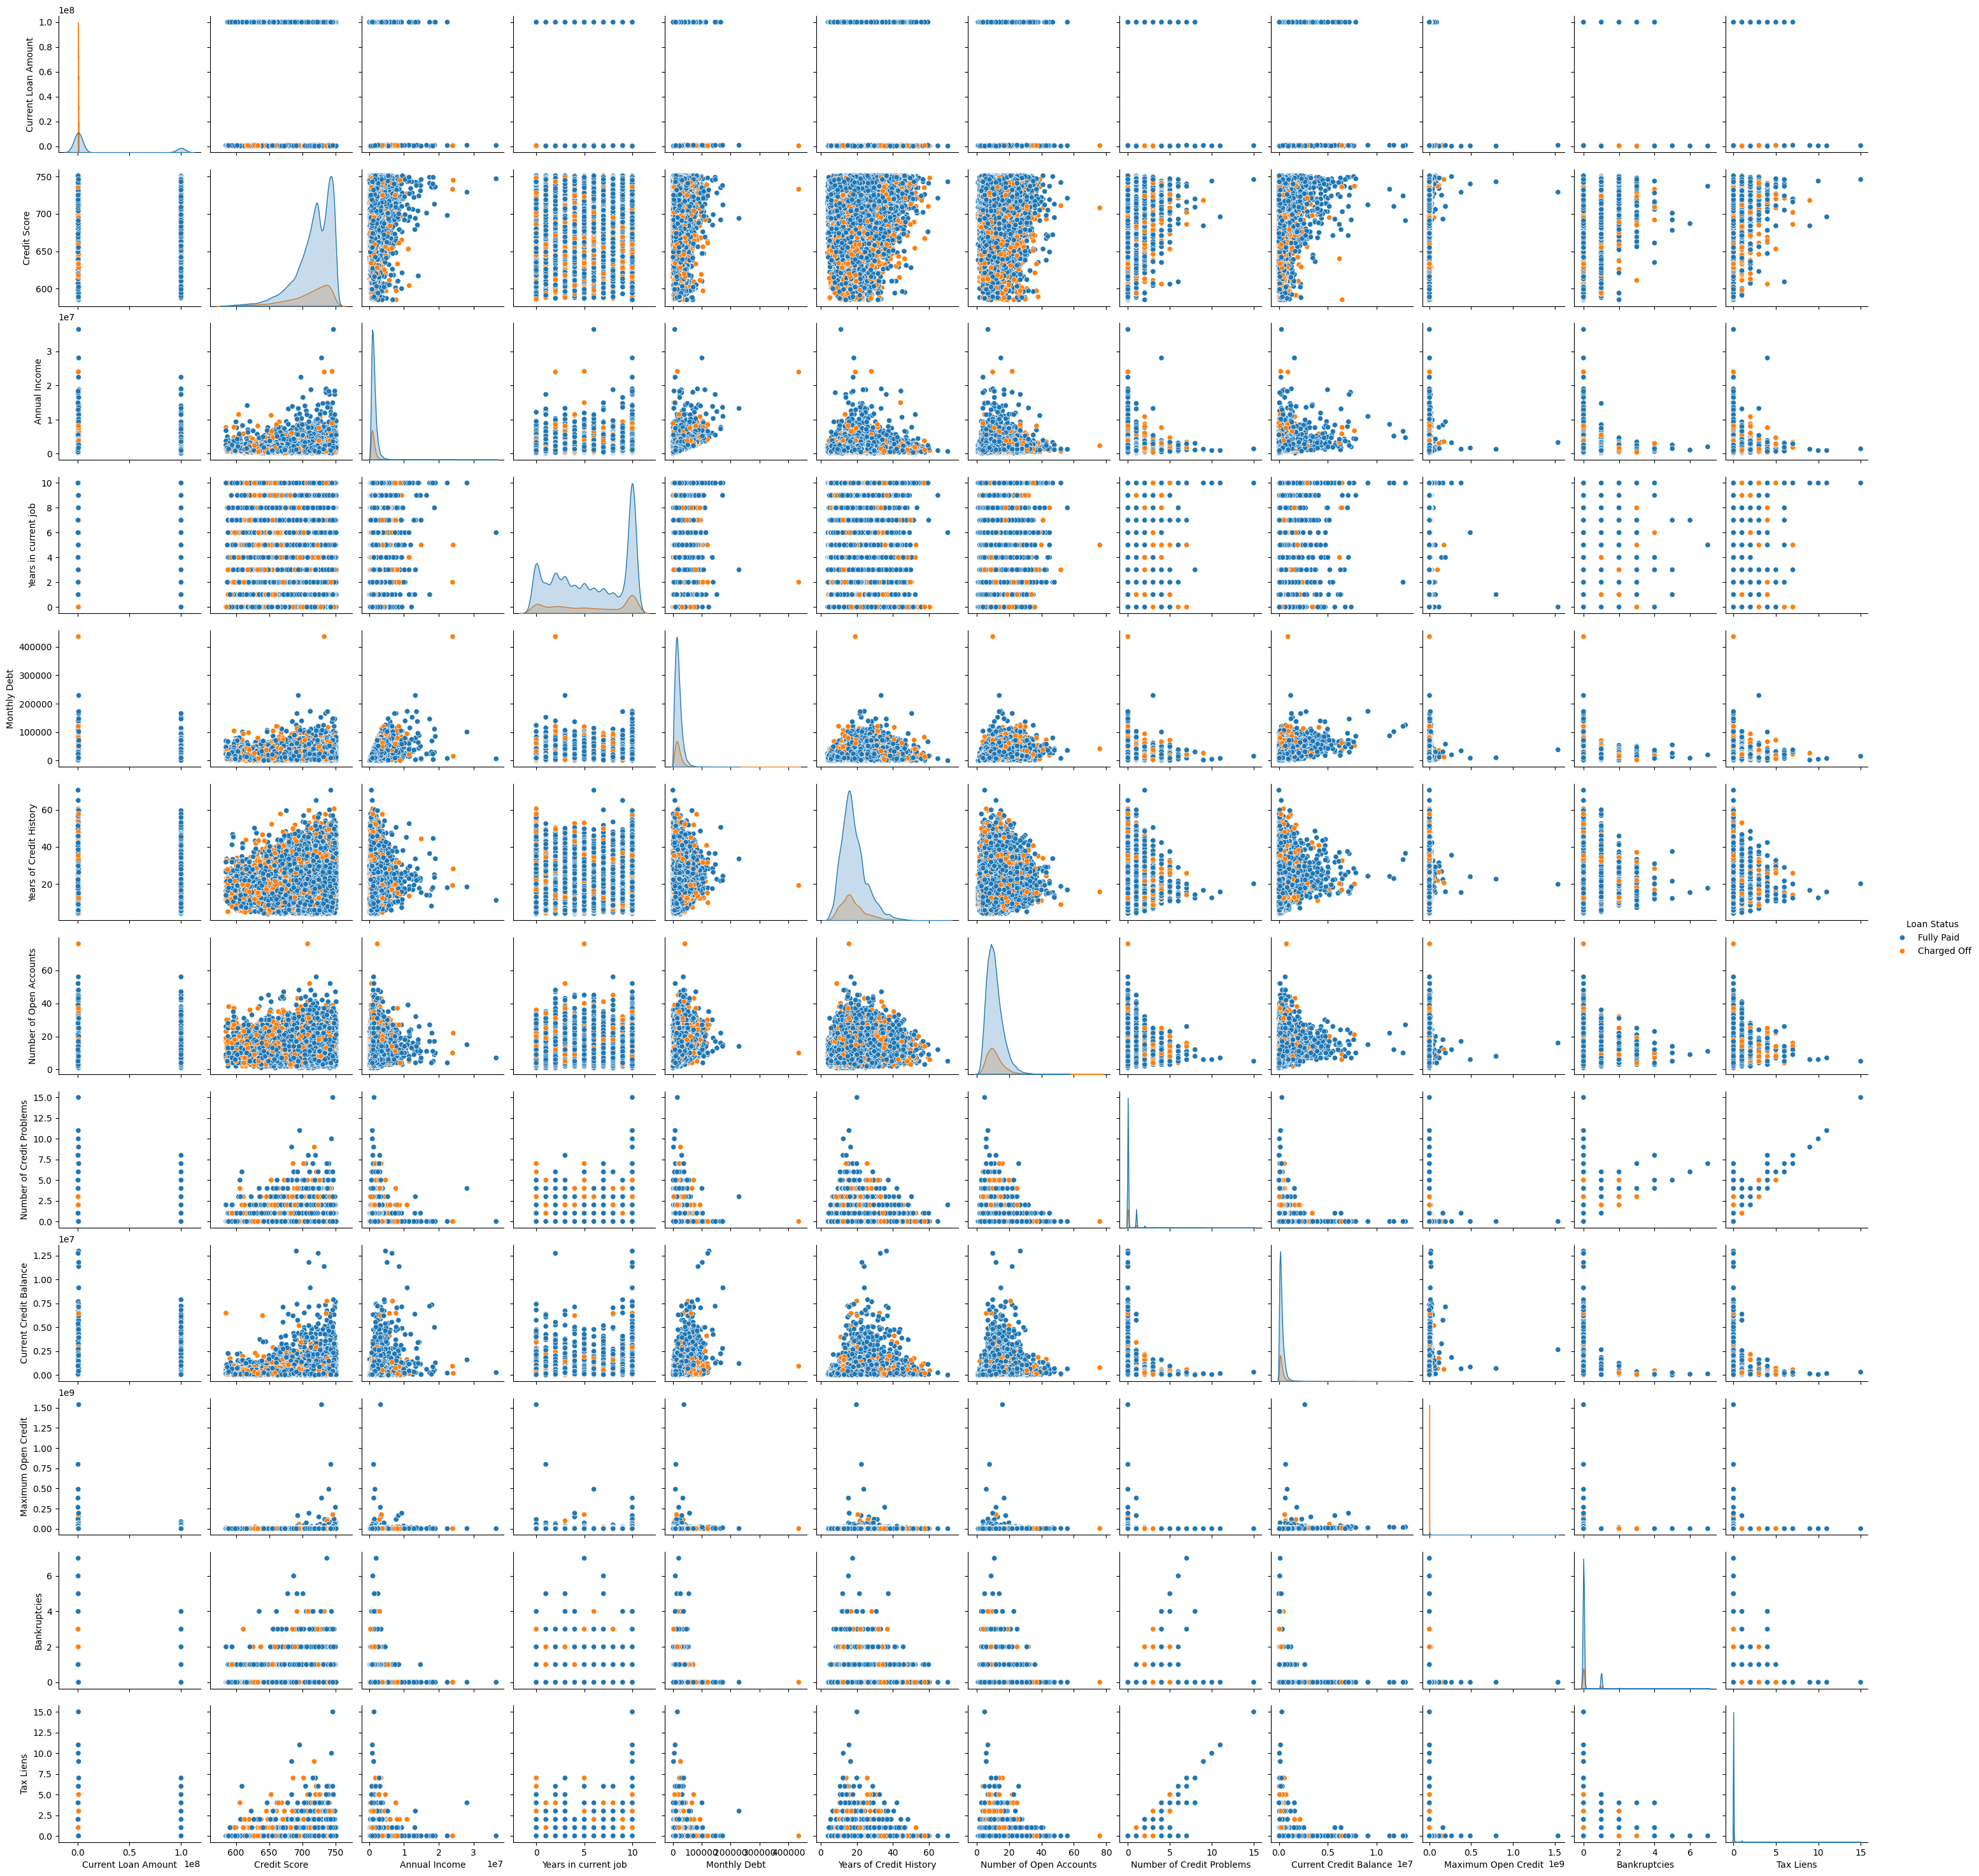

In [34]:
# Relation of all columns with Loan status
plt.figure(figsize=(20, 15))
sns.pairplot(df, hue='Loan Status')
plt.show()

In [35]:
df.isna().sum()

Loan Status                    0
Current Loan Amount            0
Term                           0
Credit Score                   0
Annual Income                  0
Years in current job           0
Home Ownership                 0
Purpose                        0
Monthly Debt                   0
Years of Credit History        0
Number of Open Accounts        0
Number of Credit Problems      0
Current Credit Balance         0
Maximum Open Credit            0
Bankruptcies                 152
Tax Liens                      6
dtype: int64

In [36]:
df["Bankruptcies"].value_counts()

Bankruptcies
0.0    67625
1.0     8095
2.0      316
3.0       79
4.0       20
5.0        5
6.0        2
7.0        1
Name: count, dtype: int64

In [37]:
df["Bankruptcies"].fillna("0.0", inplace=True)

In [38]:
df["Tax Liens"].value_counts()

Tax Liens
0.0     74807
1.0      1031
2.0       291
3.0        80
4.0        45
5.0        13
6.0        10
7.0         6
11.0        2
9.0         2
15.0        1
10.0        1
Name: count, dtype: int64

In [39]:
df["Tax Liens"].fillna("0.0", inplace=True)

In [40]:
df.isna().sum()

Loan Status                  0
Current Loan Amount          0
Term                         0
Credit Score                 0
Annual Income                0
Years in current job         0
Home Ownership               0
Purpose                      0
Monthly Debt                 0
Years of Credit History      0
Number of Open Accounts      0
Number of Credit Problems    0
Current Credit Balance       0
Maximum Open Credit          0
Bankruptcies                 0
Tax Liens                    0
dtype: int64

In [41]:
df["Term"] = list(map(lambda x: 0 if x=="Short Term" else 1, df["Term"]))

In [42]:
df["Term"].dtype

dtype('int64')

In [43]:
df["Home Ownership"].value_counts()

Home Ownership
Home Mortgage    37084
Rent             31987
Own Home          7046
HaveMortgage       178
Name: count, dtype: int64

In [44]:
df = pd.get_dummies(df, columns=["Home Ownership"], drop_first=True, dtype="float")

In [45]:
df.head()

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Home Ownership_Home Mortgage,Home Ownership_Own Home,Home Ownership_Rent
0,Fully Paid,445412.0,0,709.0,1167493.0,8,Home Improvements,5214.74,17.2,6.0,1.0,228190.0,416746.0,1.0,0.0,1.0,0.0,0.0
2,Fully Paid,99999999.0,0,741.0,2231892.0,8,Debt Consolidation,29200.53,14.9,18.0,1.0,297996.0,750090.0,0.0,0.0,0.0,1.0,0.0
3,Fully Paid,347666.0,1,721.0,806949.0,3,Debt Consolidation,8741.90,12.0,9.0,0.0,256329.0,386958.0,0.0,0.0,0.0,1.0,0.0
6,Fully Paid,217646.0,0,730.0,1184194.0,0,Debt Consolidation,10855.08,19.6,13.0,1.0,122170.0,272052.0,1.0,0.0,1.0,0.0,0.0
8,Fully Paid,548746.0,0,678.0,2559110.0,2,Debt Consolidation,18660.28,22.6,4.0,0.0,437171.0,555038.0,0.0,0.0,0.0,0.0,1.0


In [46]:
df["Purpose"].value_counts()

Purpose
Debt Consolidation      59656
other                    4762
Home Improvements        4501
Other                    2535
Business Loan            1183
Buy a Car                 976
Medical Bills             864
Buy House                 532
Take a Trip               452
major_purchase            264
small_business            213
moving                    116
wedding                    87
Educational Expenses       79
vacation                   68
renewable_energy            7
Name: count, dtype: int64

In [47]:
df["Purpose"].replace("other", "Other", inplace=True)

In [48]:
df["Purpose"].value_counts()

Purpose
Debt Consolidation      59656
Other                    7297
Home Improvements        4501
Business Loan            1183
Buy a Car                 976
Medical Bills             864
Buy House                 532
Take a Trip               452
major_purchase            264
small_business            213
moving                    116
wedding                    87
Educational Expenses       79
vacation                   68
renewable_energy            7
Name: count, dtype: int64

In [49]:
top_10_purpose = df["Purpose"].value_counts().head(10).index.tolist()

In [50]:
top_10_purpose

['Debt Consolidation',
 'Other',
 'Home Improvements',
 'Business Loan',
 'Buy a Car',
 'Medical Bills',
 'Buy House',
 'Take a Trip',
 'major_purchase',
 'small_business']

In [51]:
df["Purpose"]=list(map(lambda x: "Other" if x not in top_10_purpose else x, df["Purpose"]))

In [52]:
df["Purpose"].value_counts()

Purpose
Debt Consolidation    59656
Other                  7654
Home Improvements      4501
Business Loan          1183
Buy a Car               976
Medical Bills           864
Buy House               532
Take a Trip             452
major_purchase          264
small_business          213
Name: count, dtype: int64

In [53]:
df = pd.get_dummies(df, columns=["Purpose"], dtype="float")

In [54]:
df.shape

(76295, 27)

In [55]:
df["Loan Status"].value_counts()

Loan Status
Fully Paid     63636
Charged Off    12659
Name: count, dtype: int64

In [56]:
from sklearn.utils import resample

In [57]:
fully_paid = df[df["Loan Status"]=="Fully Paid"]
charged_off = df[df["Loan Status"]=="Charged Off"]

In [58]:
downsampled_data = resample(fully_paid, replace=False, n_samples=len(charged_off))

In [59]:
downsampled_data

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,...,Purpose_Business Loan,Purpose_Buy House,Purpose_Buy a Car,Purpose_Debt Consolidation,Purpose_Home Improvements,Purpose_Medical Bills,Purpose_Other,Purpose_Take a Trip,Purpose_major_purchase,Purpose_small_business
78766,Fully Paid,412412.0,1,646.0,873468.0,1,25912.96,10.5,18.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
62864,Fully Paid,666072.0,1,687.0,3585680.0,10,54681.81,23.3,18.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
14919,Fully Paid,546326.0,1,683.0,1981643.0,2,38476.71,17.6,16.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
23642,Fully Paid,99999999.0,0,732.0,1208457.0,6,10875.98,13.8,7.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
61242,Fully Paid,99999999.0,0,725.0,1151058.0,3,21486.34,17.1,6.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89197,Fully Paid,401148.0,1,623.0,1616748.0,0,13338.19,24.0,19.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
83672,Fully Paid,99999999.0,0,737.0,910081.0,3,14182.17,27.7,13.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
38839,Fully Paid,558030.0,1,663.0,1542192.0,5,10319.85,7.3,5.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
57748,Fully Paid,223102.0,0,697.0,789982.0,10,16392.25,19.4,8.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [60]:
charged_off

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,...,Purpose_Business Loan,Purpose_Buy House,Purpose_Buy a Car,Purpose_Debt Consolidation,Purpose_Home Improvements,Purpose_Medical Bills,Purpose_Other,Purpose_Take a Trip,Purpose_major_purchase,Purpose_small_business
20,Charged Off,317108.0,1,687.0,1133274.0,8,9632.81,17.4,4.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
22,Charged Off,153252.0,0,714.0,1890690.0,2,21900.35,15.7,12.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
32,Charged Off,130174.0,0,733.0,524609.0,0,9311.71,15.4,7.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
40,Charged Off,688468.0,1,682.0,1494616.0,0,14697.07,16.6,8.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
49,Charged Off,456808.0,1,598.0,1096167.0,10,14341.39,14.1,8.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99950,Charged Off,486046.0,1,695.0,1440827.0,8,33979.22,33.5,18.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
99954,Charged Off,316426.0,1,659.0,1613062.0,1,15189.74,21.5,25.0,2.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
99963,Charged Off,380204.0,0,728.0,1046805.0,0,32625.28,16.9,8.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
99975,Charged Off,274076.0,0,736.0,709650.0,10,4204.70,35.3,13.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [61]:
new_df = pd.concat([downsampled_data, charged_off], axis=0)

In [62]:
new_df.reset_index(drop=True, inplace=True)

In [63]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25318 entries, 0 to 25317
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Loan Status                   25318 non-null  object 
 1   Current Loan Amount           25318 non-null  float64
 2   Term                          25318 non-null  int64  
 3   Credit Score                  25318 non-null  float64
 4   Annual Income                 25318 non-null  float64
 5   Years in current job          25318 non-null  int32  
 6   Monthly Debt                  25318 non-null  float64
 7   Years of Credit History       25318 non-null  float64
 8   Number of Open Accounts       25318 non-null  float64
 9   Number of Credit Problems     25318 non-null  float64
 10  Current Credit Balance        25318 non-null  float64
 11  Maximum Open Credit           25318 non-null  float64
 12  Bankruptcies                  25318 non-null  object 
 13  T

In [64]:
new_df["Bankruptcies"]=new_df["Bankruptcies"].astype("float")
new_df["Tax Liens"]=new_df["Tax Liens"].astype("float")

In [65]:
X = new_df.drop("Loan Status", axis=1)
y = new_df["Loan Status"]

In [66]:
X.shape

(25318, 26)

In [67]:
y.shape

(25318,)

In [68]:
from sklearn.decomposition import PCA

In [69]:
pca = PCA(n_components=10)

In [70]:
new_X = pca.fit_transform(X)

In [71]:
new_X

array([[-8.90714334e+06, -2.49954217e+05, -4.34060956e+05, ...,
         5.76508200e+00,  4.38887127e+00,  4.57750659e-01],
       [-8.65120740e+06,  3.91011895e+05,  2.25243011e+06, ...,
         1.61297690e+00, -2.42061993e+00, -1.96383301e-01],
       [-8.77233138e+06, -9.66988529e+04,  6.59391308e+05, ...,
         1.86788591e+00,  4.35764356e+00,  3.89276097e-03],
       ...,
       [-8.93922594e+06, -2.72118427e+05, -2.60785143e+05, ...,
        -5.61899286e+00,  5.78208238e+00, -9.95377259e-02],
       [-9.04547001e+06,  1.22235660e+05, -6.49351617e+05, ...,
         2.62618055e+00, -3.53346844e+00,  9.91550933e-01],
       [-8.65037443e+06,  5.15396754e+05,  2.48425240e+06, ...,
         3.71713789e+00, -5.80329526e-01, -2.66130014e-01]])

In [72]:
X_tr, X_te, y_tr, y_te = train_test_split(new_X, y, test_size=0.3, random_state=25)

In [73]:
X_tr.shape

(17722, 10)

In [74]:
X_te.shape

(7596, 10)

In [75]:
from sklearn.preprocessing import StandardScaler

In [76]:
scaler = StandardScaler()

In [77]:
X_tr = scaler.fit_transform(X_tr)

In [78]:
X_te = scaler.transform(X_te)

In [79]:
svc = SVC(kernel="linear")

In [80]:
svc.fit(X_tr, y_tr)

SVC(kernel='linear')

In [81]:
y_pr = svc.predict(X_te)

In [82]:
accuracy_score(y_te, y_pr)

0.6026856240126383

In [83]:
svc.score(X_tr, y_tr)

0.6032050558627694

In [84]:
model = SVC(C=5)

In [85]:
model.fit(X_tr, y_tr)

SVC(C=5)

In [86]:
model.score(X_tr, y_tr)

0.6527479968400858

In [87]:
y_pr2 = model.predict(X_te)

In [88]:
accuracy_score(y_te, y_pr2)

0.6286203264876251

In [89]:
print(classification_report(y_te, y_pr2))

              precision    recall  f1-score   support

 Charged Off       0.59      0.82      0.69      3804
  Fully Paid       0.71      0.43      0.54      3792

    accuracy                           0.63      7596
   macro avg       0.65      0.63      0.61      7596
weighted avg       0.65      0.63      0.61      7596



In [90]:
confusion_matrix(y_te, y_pr2)

array([[3129,  675],
       [2146, 1646]], dtype=int64)

In [91]:
m2 = SVC(kernel="poly",C=5)

In [92]:
m2.fit(X_tr, y_tr)
print("Training Score",m2.score(X_tr, y_tr))
print("Testing Score", accuracy_score(y_te, m2.predict(X_te)))

Training Score 0.619625324455479
Testing Score 0.6140073723012112


In [93]:
m3 = SVC(kernel="rbf")
m3.fit(X_tr, y_tr)
print("Training Score",m3.score(X_tr, y_tr))
print("Testing Score", accuracy_score(y_te, m3.predict(X_te)))

Training Score 0.6332242410563141
Testing Score 0.625724065297525


In [94]:
df[(df["Credit Score"]>=700)&(df["Credit Score"]<=900)]

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,...,Purpose_Business Loan,Purpose_Buy House,Purpose_Buy a Car,Purpose_Debt Consolidation,Purpose_Home Improvements,Purpose_Medical Bills,Purpose_Other,Purpose_Take a Trip,Purpose_major_purchase,Purpose_small_business
0,Fully Paid,445412.0,0,709.0,1167493.0,8,5214.74,17.2,6.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,Fully Paid,99999999.0,0,741.0,2231892.0,8,29200.53,14.9,18.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Fully Paid,347666.0,1,721.0,806949.0,3,8741.90,12.0,9.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6,Fully Paid,217646.0,0,730.0,1184194.0,0,10855.08,19.6,13.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9,Fully Paid,215952.0,0,739.0,1454735.0,0,39277.75,13.9,20.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,Fully Paid,147070.0,0,725.0,475437.0,7,2202.86,22.3,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
99996,Fully Paid,99999999.0,0,732.0,1289416.0,1,13109.05,9.4,22.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
99997,Fully Paid,103136.0,0,742.0,1150545.0,6,7315.57,18.8,12.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
99998,Fully Paid,530332.0,0,746.0,1717524.0,9,9890.07,15.0,8.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
